# BATTERY HEALTH ESTIMATION USING RANDOM FOREST

# Load dataset dan melakukan penggabungan data

In [1]:
# prompt: Tolong buatkan kode untuk menggabungkan data B5_no_outliers, B6_no_outliers, B7_no_outliers dan B18_no_outliers

import pandas as pd

# Memuat data
B5_no_outliers = pd.read_csv('B5_no_outliers.csv')
B6_no_outliers = pd.read_csv('B6_no_outliers.csv')
B7_no_outliers = pd.read_csv('B7_no_outliers.csv')
B18_no_outliers = pd.read_csv('B18_no_outliers.csv')

# Menggabungkan data
# Anda dapat memilih metode penggabungan yang sesuai dengan kebutuhan Anda.
# Contoh ini menggunakan pd.concat untuk menggabungkan DataFrame secara vertikal.
# Pastikan kolom-kolom pada setiap DataFrame sesuai.

data = pd.concat([B5_no_outliers, B6_no_outliers, B7_no_outliers, B18_no_outliers], ignore_index=True)

# Menampilkan beberapa baris pertama dari data yang digabung
print(data.head())

# Menampilkan informasi ringkasan data yang digabung
print(data.info())

# Anda dapat menyimpan data yang digabung ke file baru jika diperlukan
# data_gabungan.to_csv('data_gabungan.csv', index=False)


   Cycle      CVCT      CCCT        TCT      AVCC      ACCV        TES  \
0    1.0  7365.031  3295.203  10510.500  3.938468  0.337986  3648.3038   
1    2.0  7336.516  3292.015  10479.000  3.938271  0.338634  3642.4987   
2    3.0  7270.172  3270.703  10392.437  3.939704  0.342116  3635.4780   
3    4.0  7357.391  3269.672  10489.750  3.937890  0.335312  3625.7718   
4    5.0  7653.984  3271.094  10787.219  3.936450  0.324397  3625.2148   

           IVCC        IVCCCV    RMSVCC   SkewVCC   KurtVCC    RMSCCV  \
0  13169.073485  43532.522430  3.941282 -0.733559  0.775162  0.530744   
1  13152.242170  43393.248950  3.940939 -0.625230  0.600176  0.531930   
2  13067.226735  43034.623375  3.942210 -0.529928  0.436963  0.535404   
3  13058.280595  43434.649985  3.940433 -0.548428  0.468969  0.529358   
4  13060.646590  44680.774810  3.939036 -0.570282  0.521506  0.520023   

    SkewCCV   KurtCCV  capacity       soh  
0  1.589356  1.469541  1.846327  1.000000  
1  1.575657  1.428890  1.835

# Uji korelasi dari setiap fitur dengan soh

In [2]:
# prompt: Tolong buatkan korelasi antara fitur 'CVCT', 'CCCT', 'TCT', 'AVCC', 'ACCV', 'TES', 'IVCC', 'IVCCCV',  'RMSVCC', 'SkewVCC', 'KurtVCC', 'RMSCCV', 'SkewCCV', 'KurtCCV' pada data dengan soh

# Daftar fitur yang akan dianalisis korelasinya
features = ['CVCT', 'CCCT', 'TCT', 'AVCC', 'ACCV', 'TES', 'IVCC', 'IVCCCV', 'RMSVCC', 'SkewVCC', 'KurtVCC', 'RMSCCV', 'SkewCCV', 'KurtCCV', 'soh']

# Memilih kolom yang relevan untuk analisis korelasi
data_subset = data[features]

# Menghitung matriks korelasi
correlation_matrix = data_subset.corr()

# Mendapatkan korelasi antara fitur-fitur yang dipilih dengan 'soh'
soh_correlation = correlation_matrix['soh']

# Menampilkan hasil korelasi
print("Korelasi fitur-fitur dengan 'soh':")
soh_correlation


Korelasi fitur-fitur dengan 'soh':


,soh
CVCT,-0.829302
CCCT,0.979649
TCT,-0.118981
AVCC,-0.885703
ACCV,0.108313
TES,-0.127765
IVCC,0.979112
IVCCCV,-0.207240
RMSVCC,-0.887104
SkewVCC,-0.187644


In [3]:
# prompt: tolong urutkan dari nilai korelasi terbesar ke terkecil

# Mengurutkan korelasi dari nilai terbesar ke terkecil (nilai absolut)
# Menggunakan abs() untuk mengurutkan berdasarkan kekuatan korelasi, terlepas dari arahnya (positif atau negatif)
# Anda bisa menghapus abs() jika ingin mengurutkan berdasarkan nilai korelasi sebenarnya
sorted_soh_correlation = soh_correlation.abs().sort_values(ascending=False)

# Menampilkan hasil korelasi yang sudah diurutkan
print("\nKorelasi fitur-fitur dengan 'soh' (diurutkan berdasarkan nilai absolut):")
sorted_soh_correlation

# Jika Anda ingin mengurutkan berdasarkan nilai korelasi sebenarnya dari terbesar ke terkecil:
# sorted_soh_correlation_actual = soh_correlation.sort_values(ascending=False)
# print("\nKorelasi fitur-fitur dengan 'soh' (diurutkan berdasarkan nilai sebenarnya):")
# print(sorted_soh_correlation_actual)



Korelasi fitur-fitur dengan 'soh' (diurutkan berdasarkan nilai absolut):


,soh
soh,1.000000
CCCT,0.979649
IVCC,0.979112
RMSVCC,0.887104
AVCC,0.885703
CVCT,0.829302
KurtVCC,0.485275
IVCCCV,0.207240
SkewVCC,0.187644
RMSCCV,0.161047


# Model uses all features

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Load dataset
# data = pd.read_csv('B6_no_outliers.csv')

# Select features and target
features = ['CVCT', 'CCCT', 'TCT', 'AVCC', 'ACCV', 'TES', 'IVCC', 'IVCCCV',
            'RMSVCC', 'SkewVCC', 'KurtVCC', 'RMSCCV', 'SkewCCV', 'KurtCCV']
target = 'soh'

X = data[features]
y = data[target]

# Split data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training predictions
    train_pred = model.predict(X_train)

    # Testing predictions
    test_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'Train MAE': mean_absolute_error(y_train, train_pred),
        'Test MAE': mean_absolute_error(y_test, test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, test_pred)),
        'Train R2': r2_score(y_train, train_pred),
        'Test R2': r2_score(y_test, test_pred)
    }

    return metrics, train_pred, test_pred

# Function to plot results
def plot_results(y_true, y_pred, title):
    plt.figure(figsize=(5, 3))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual SoH')
    plt.ylabel('Estimated SoH')
    plt.title(title)
    plt.grid(True)
    plt.show()

# 2. Random Forest
print("\nTraining Random Forest...")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_

print(best_rf)


Training Random Forest...
RandomForestRegressor(n_estimators=50, random_state=42)


In [5]:
rf_metrics, rf_train_pred, rf_test_pred = evaluate_model(best_rf, X_train_scaled, X_test_scaled, y_train, y_test)

# Display results
results = pd.DataFrame({
    # 'Decision Tree': dt_metrics
    'Random Forest': rf_metrics
    # 'XGBoost': xgb_metrics
})

print("\nModel Performance Comparison:")
print(results)




Model Performance Comparison:
            Random Forest
Train MAE        0.003980
Test MAE         0.011204
Train RMSE       0.005967
Test RMSE        0.016566
Train R2         0.997081
Test R2          0.975377


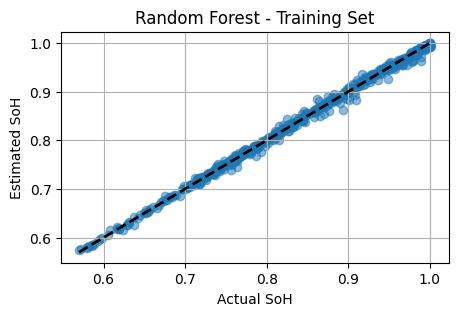

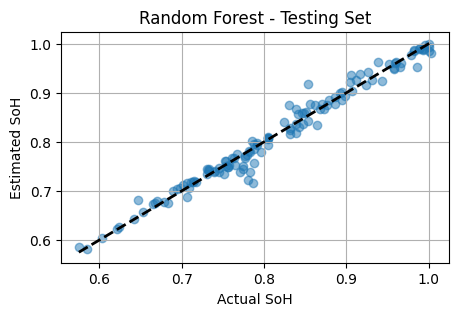

In [6]:
# Plot results
plot_results(y_train, rf_train_pred, 'Random Forest - Training Set')
plot_results(y_test, rf_test_pred, 'Random Forest - Testing Set')